# Analysis
oberved trend 1 
The Temperature will be higher near to the equator.
oberved trend 2
High humidity appears to occur in cities located between -40 to 40 latitude.
oberved trend 3
There are more cities when latitude greater than -40.

In [235]:
# Import dedendencies
import pandas as pd
import requests as req
from citipy import citipy 
import matplotlib.pyplot as plt
import seaborn as sns
import time
import json

#import API keys
from config import api_key

In [236]:
#create empty lists
lat = []
lng = []
cities=[]

for x in range(-90,90,1):
    for y in range(-180,180,1):
        lat.append(x)
        lng.append(y)
        city = citipy.nearest_city(x, y)
        cities.append(city.city_name)

data=pd.DataFrame(
              {"City":cities,"Lat":lat,"Lng":lng})      

new_data=data.drop_duplicates("City",keep="first")

#Create dataframe. Grab 500 random cities
samplecity = new_data.sample(500)

In [237]:
#Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url=f"{url}appid={api_key}&units={units}&q="

# Create blank columns for necessary fields
count=0
samplecity["Clouds"]=""
samplecity["Country"]=""
samplecity["Data"]=""
samplecity["Temperature"]=""
samplecity["Humidity"]=""
samplecity["Wind Speed"]=""

print("Beginning Data Retrieval")
print("-"*30)

#iterate through the rows to pull data from the api 
for index, row in samplecity.iterrows():
    count +=1
    city = row["City"]
    target_url = url+"lat="+str(row["Lat"])+"&lon="+str(row["Lng"])+"&appid="+api_key+"&units="+units
    print("Processing Record" + " " + str(count))
    print(target_url)
        
    info= req.get(target_url).json()
    try:
        clouds=info["clouds"]["all"]
        country=info['sys']['country']
        data=info["dt"]
        humidity=info["main"]["humidity"]
        temp=info["main"]["temp_max"]
        wind=info["wind"]["speed"]
        
        samplecity.set_value(index, "Clouds", clouds)
        samplecity.set_value(index, "Country", country)
        samplecity.set_value(index, "Data", data)
        samplecity.set_value(index, "Temperature", humidity)
        samplecity.set_value(index, "Humidity", temp)
        samplecity.set_value(index, "Wind Speed", wind)
        time.sleep(1)
    except:
        samplecity.set_value(index, "Clouds", 0)
        samplecity.set_value(index, "Country", 0)
        samplecity.set_value(index, "Data", 0)
        samplecity.set_value(index, "Temperature", 0)
        samplecity.set_value(index, "Humidity", 0)
        samplecity.set_value(index, "Wind Speed", 0)
        continue

print("-"*30)  
print("Data Retrieval Complete")  

Beginning Data Retrieval
------------------------------
Processing Record 1
http://api.openweathermap.org/data/2.5/weather?lat=31&lon=-114&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 2
http://api.openweathermap.org/data/2.5/weather?lat=41&lon=-5&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 3
http://api.openweathermap.org/data/2.5/weather?lat=-3&lon=105&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 4
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=104&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 5
http://api.openweathermap.org/data/2.5/weather?lat=35&lon=-106&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 6
http://api.openweathermap.org/data/2.5/weather?lat=21&lon=-159&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 7
http://api.openweathermap.org/data/2.5/weather?lat=-37&lon=147&appid=a214a975de76ced2b788809227a51c4d&units

Processing Record 61
http://api.openweathermap.org/data/2.5/weather?lat=51&lon=96&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 62
http://api.openweathermap.org/data/2.5/weather?lat=39&lon=123&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 63
http://api.openweathermap.org/data/2.5/weather?lat=55&lon=138&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 64
http://api.openweathermap.org/data/2.5/weather?lat=34&lon=49&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 65
http://api.openweathermap.org/data/2.5/weather?lat=24&lon=-106&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 66
http://api.openweathermap.org/data/2.5/weather?lat=47&lon=24&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 67
http://api.openweathermap.org/data/2.5/weather?lat=51&lon=-101&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 68
http://api.openweathe

Processing Record 121
http://api.openweathermap.org/data/2.5/weather?lat=43&lon=25&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 122
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=23&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 123
http://api.openweathermap.org/data/2.5/weather?lat=-20&lon=51&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 124
http://api.openweathermap.org/data/2.5/weather?lat=63&lon=50&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 125
http://api.openweathermap.org/data/2.5/weather?lat=40&lon=127&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 126
http://api.openweathermap.org/data/2.5/weather?lat=-8&lon=-42&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 127
http://api.openweathermap.org/data/2.5/weather?lat=54&lon=60&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 128
http://api.openwe

Processing Record 181
http://api.openweathermap.org/data/2.5/weather?lat=31&lon=-85&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 182
http://api.openweathermap.org/data/2.5/weather?lat=-50&lon=24&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 183
http://api.openweathermap.org/data/2.5/weather?lat=59&lon=32&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 184
http://api.openweathermap.org/data/2.5/weather?lat=14&lon=38&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 185
http://api.openweathermap.org/data/2.5/weather?lat=56&lon=85&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 186
http://api.openweathermap.org/data/2.5/weather?lat=35&lon=59&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 187
http://api.openweathermap.org/data/2.5/weather?lat=29&lon=30&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 188
http://api.openwe

Processing Record 241
http://api.openweathermap.org/data/2.5/weather?lat=38&lon=-108&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 242
http://api.openweathermap.org/data/2.5/weather?lat=39&lon=-89&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 243
http://api.openweathermap.org/data/2.5/weather?lat=3&lon=13&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 244
http://api.openweathermap.org/data/2.5/weather?lat=13&lon=77&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 245
http://api.openweathermap.org/data/2.5/weather?lat=-34&lon=21&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 246
http://api.openweathermap.org/data/2.5/weather?lat=57&lon=108&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 247
http://api.openweathermap.org/data/2.5/weather?lat=58&lon=50&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 248
http://api.open

Processing Record 301
http://api.openweathermap.org/data/2.5/weather?lat=-15&lon=-71&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 302
http://api.openweathermap.org/data/2.5/weather?lat=45&lon=32&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 303
http://api.openweathermap.org/data/2.5/weather?lat=54&lon=5&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 304
http://api.openweathermap.org/data/2.5/weather?lat=-29&lon=30&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 305
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=-46&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 306
http://api.openweathermap.org/data/2.5/weather?lat=-6&lon=114&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 307
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=36&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 308
http://api.openwe

Processing Record 361
http://api.openweathermap.org/data/2.5/weather?lat=60&lon=15&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 362
http://api.openweathermap.org/data/2.5/weather?lat=-22&lon=24&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 363
http://api.openweathermap.org/data/2.5/weather?lat=-28&lon=-50&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 364
http://api.openweathermap.org/data/2.5/weather?lat=-18&lon=-33&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 365
http://api.openweathermap.org/data/2.5/weather?lat=51&lon=-82&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 366
http://api.openweathermap.org/data/2.5/weather?lat=29&lon=116&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 367
http://api.openweathermap.org/data/2.5/weather?lat=18&lon=98&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 368
http://api.o

Processing Record 421
http://api.openweathermap.org/data/2.5/weather?lat=38&lon=-120&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 422
http://api.openweathermap.org/data/2.5/weather?lat=61&lon=120&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 423
http://api.openweathermap.org/data/2.5/weather?lat=-1&lon=-50&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 424
http://api.openweathermap.org/data/2.5/weather?lat=30&lon=51&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 425
http://api.openweathermap.org/data/2.5/weather?lat=47&lon=14&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 426
http://api.openweathermap.org/data/2.5/weather?lat=13&lon=-15&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 427
http://api.openweathermap.org/data/2.5/weather?lat=15&lon=-5&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 428
http://api.ope

Processing Record 481
http://api.openweathermap.org/data/2.5/weather?lat=57&lon=81&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 482
http://api.openweathermap.org/data/2.5/weather?lat=36&lon=-8&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 483
http://api.openweathermap.org/data/2.5/weather?lat=46&lon=16&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 484
http://api.openweathermap.org/data/2.5/weather?lat=-6&lon=14&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 485
http://api.openweathermap.org/data/2.5/weather?lat=6&lon=-168&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 486
http://api.openweathermap.org/data/2.5/weather?lat=69&lon=16&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 487
http://api.openweathermap.org/data/2.5/weather?lat=-28&lon=28&appid=a214a975de76ced2b788809227a51c4d&units=imperial
Processing Record 488
http://api.openwe

In [238]:
samplecity.count()

City           500
Lat            500
Lng            500
Clouds         500
Country        500
Data           500
Temperature    500
Humidity       500
Wind Speed     500
dtype: int64

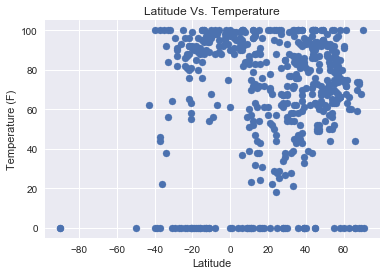

In [239]:
#Latitude Vs Temperature 
plt.scatter(samplecity["Lat"],samplecity["Temperature"],marker ="o")
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set()
plt.show()


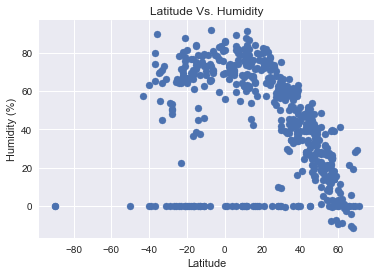

In [240]:
#Humidity Vs. Latitude
plt.scatter(samplecity["Lat"],samplecity["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
sns.set()
plt.show()

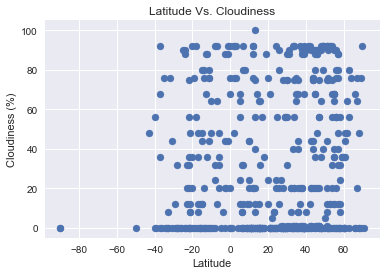

In [241]:
#Cloudiness Vs. Latitude 
plt.scatter(samplecity["Lat"],samplecity["Clouds"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.show()

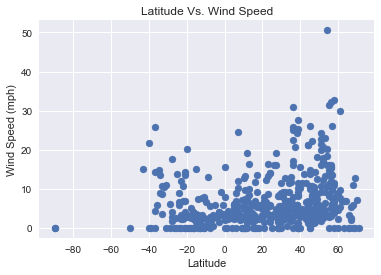

In [242]:
#Wind Speed Vs. Latitude
plt.scatter(samplecity["Lat"],samplecity["Wind Speed"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.show()

